In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt




In [2]:
#Reading the CSV-file
data = pd.read_csv("Occupancy_Estimation.csv")

data.head()

Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1  2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2  2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3  2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4  2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.769231       0       0                     1  
1     390      0.646154       0       0                     1  
2     390      0.519231       0       0                     1  
3     390      0.388462       0       0                     1  
4     390      0.253846       0       0                     1

In [3]:
#printing the dimensions of the dataset
print(data.shape)

(10129, 19)


In [4]:
#calculate how much null values in each column
data.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [5]:
#checking the data type of each column
data.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

In [6]:
#having an overview of each column important information
data.describe()

S1_Temp       S2_Temp       S3_Temp       S4_Temp      S1_Light  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      25.454012     25.546059     25.056621     25.754125     25.445059   
std        0.351351      0.586325      0.427283      0.356434     51.011264   
min       24.940000     24.750000     24.440000     24.940000      0.000000   
25%       25.190000     25.190000     24.690000     25.440000      0.000000   
50%       25.380000     25.380000     24.940000     25.750000      0.000000   
75%       25.630000     25.630000     25.380000     26.000000     12.000000   
max       26.380000     29.000000     26.190000     26.560000    165.000000   

          S2_Light      S3_Light      S4_Light      S1_Sound      S2_Sound  \
count  10129.00000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      26.01629     34.248494     13.220259      0.168178      0.120066   
std       67.30417     58.400744     19.602219      0.316709      0.266503   
min        0.00000      0.000000      0.000000      0.060000      0.040000   
25%        0.00000      0.000000      0.000000      0.070000      0.050000   
50%        0.00000      0.000000      0.000000      0.080000      0.050000   
75%       14.00000     50.000000     22.000000      0.080000      0.060000   
max      258.00000    280.000000     74.000000      3.880000      3.440000   

           S3_Sound      S4_Sound        S5_CO2  S5_CO2_Slope        S6_PIR  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean       0.158119      0.103840    460.860401     -0.004830      0.090137   
std        0.413637      0.120683    199.964940      1.164990      0.286392   
min        0.040000      0.050000    345.000000     -6.296154      0.000000   
25%        0.060000      0.060000    355.000000     -0.046154      0.000000   
50%        0.060000      0.080000    360.000000      0.000000      0.000000   
75%        0.070000      0.100000    465.000000      0.000000      0.000000   
max        3.670000      3.400000   1270.000000      8.980769      1.000000   

             S7_PIR  Room_Occupancy_Count  
count  10129.000000          10129.000000  
mean       0.079574              0.398559  
std        0.270645              0.893633  
min        0.000000              0.000000  
25%        0.000000              0.000000  
50%        0.000000              0.000000  
75%        0.000000              0.000000  
max        1.000000              3.000000

In [7]:
#calculating the number of each instance in the target feature
data['Room_Occupancy_Count'].value_counts()

0    8228
2     748
3     694
1     459
Name: Room_Occupancy_Count, dtype: int64

# Data preprocessing:

In [8]:
#droping the Date and Time columns
data = data.drop(['Date', 'Time'], axis=1) 

In [9]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Select all columns except the target feature for scaling
feature_columns = [column for column in data.columns if column != 'Room_Occupancy_Count']

# Apply the scaler on all columns except the target feature
data[feature_columns] = scaler.fit_transform(data[feature_columns])


In [10]:
data.head()

S1_Temp   S2_Temp   S3_Temp   S4_Temp  S1_Light  S2_Light  S3_Light  \
0 -1.463033 -1.357775 -1.162334 -1.049684  1.873305  0.118627  0.321099   
1 -1.463033 -1.357775 -1.162334 -0.881342  1.873305  0.103769  0.321099   
2 -1.292255 -1.357775 -1.302764 -0.881342  1.873305  0.118627  0.321099   
3 -1.292255 -1.357775 -1.162334 -0.881342  1.873305  0.118627  0.321099   
4 -1.292255 -1.357775 -1.162334 -0.881342  1.873305  0.118627  0.338223   

   S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound    S5_CO2  S5_CO2_Slope  \
0  1.366226 -0.278432  0.262426 -0.237223 -0.363288 -0.354382      0.664469   
1  1.366226  2.405552 -0.262923 -0.237223 -0.363288 -0.354382      0.558817   
2  1.366226  0.826738 -0.037773 -0.188869 -0.363288 -0.354382      0.449864   
3  1.366226  0.763585 -0.075298 -0.140515 -0.114690 -0.354382      0.337609   
4  1.366226  0.037331 -0.225398 -0.237223 -0.363288 -0.354382      0.222053   

     S6_PIR    S7_PIR  Room_Occupancy_Count  
0 -0.314749 -0.294029                     1  
1 -0.314749 -0.294029                     1  
2 -0.314749 -0.294029                     1  
3 -0.314749 -0.294029                     1  
4 -0.314749 -0.294029                     1

# EDA

In [11]:
# IQR and Outliers for each column
for column in data.columns:
    
    print(f'Analysis of {column}')
    print(f'Number of Elements: {data[column].count()}') 

    #calculate the first Q and the the third Q so calculate the IQR    
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    #calculate how much outlier in each column
    outliers = data[column][(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    print(f'IQR: {IQR}')
    print(f'Number of Outliers: {outliers.count()}')
    
    print('--------------------------------------------------\n')  


Analysis of S1_Temp
Number of Elements: 10129
IQR: 1.2523723662432937
Number of Outliers: 162
--------------------------------------------------

Analysis of S2_Temp
Number of Elements: 10129
IQR: 0.7504735138083753
Number of Outliers: 948
--------------------------------------------------

Analysis of S3_Temp
Number of Elements: 10129
IQR: 1.6149363704362045
Number of Outliers: 0
--------------------------------------------------

Analysis of S4_Temp
Number of Elements: 10129
IQR: 1.5711956009067243
Number of Outliers: 0
--------------------------------------------------

Analysis of S1_Light
Number of Elements: 10129
IQR: 0.23525377437520106
Number of Outliers: 1716
--------------------------------------------------

Analysis of S2_Light
Number of Elements: 10129
IQR: 0.2080211535551925
Number of Outliers: 1017
--------------------------------------------------

Analysis of S3_Light
Number of Elements: 10129
IQR: 0.8561957452548712
Number of Outliers: 950
----------------------------

Analysis of S1_Temp
Number of Elements: 10129
IQR: 1.2523723662432937
Number of Outliers: 162


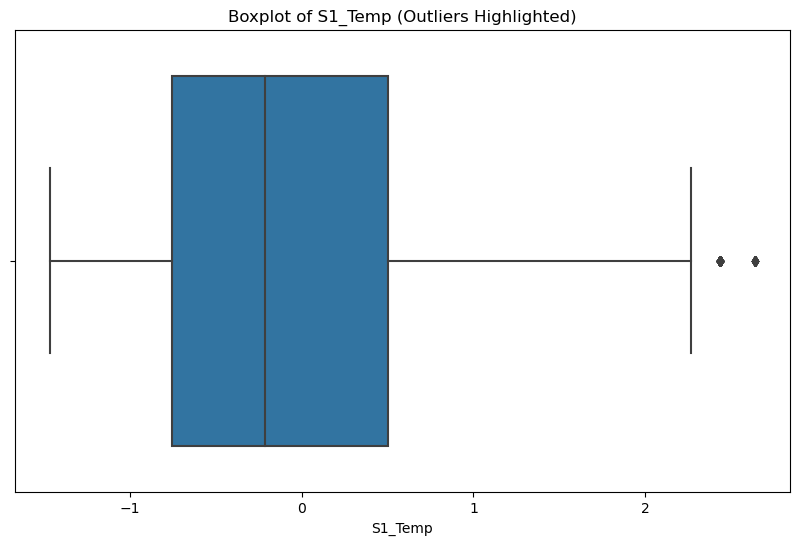

--------------------------------------------------

Analysis of S2_Temp
Number of Elements: 10129
IQR: 0.7504735138083753
Number of Outliers: 948


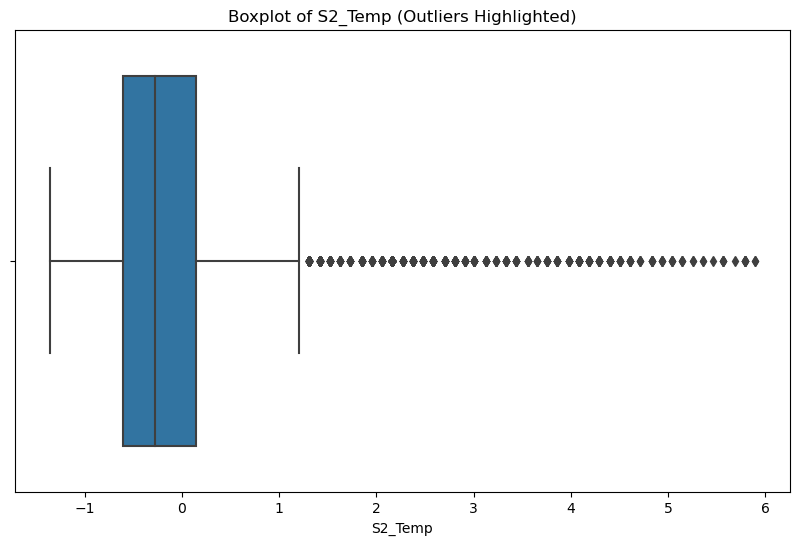

--------------------------------------------------

Analysis of S3_Temp
Number of Elements: 10129
IQR: 1.6149363704362045
Number of Outliers: 0


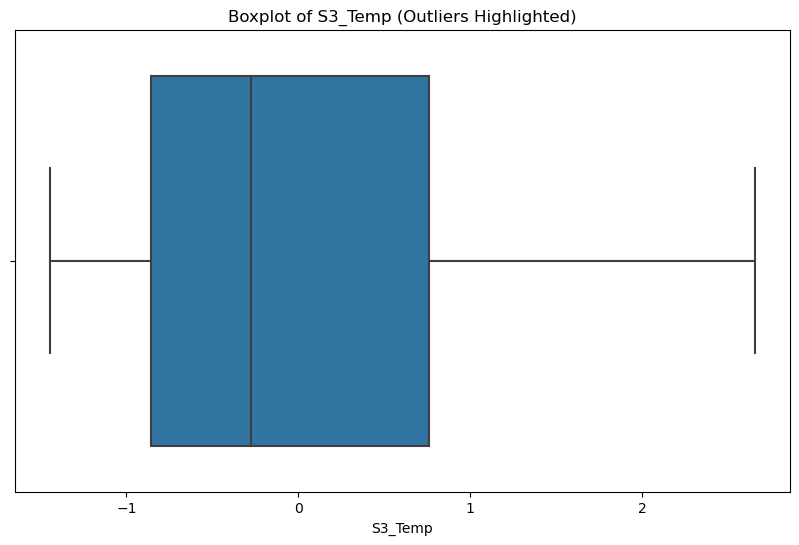

--------------------------------------------------

Analysis of S4_Temp
Number of Elements: 10129
IQR: 1.5711956009067243
Number of Outliers: 0


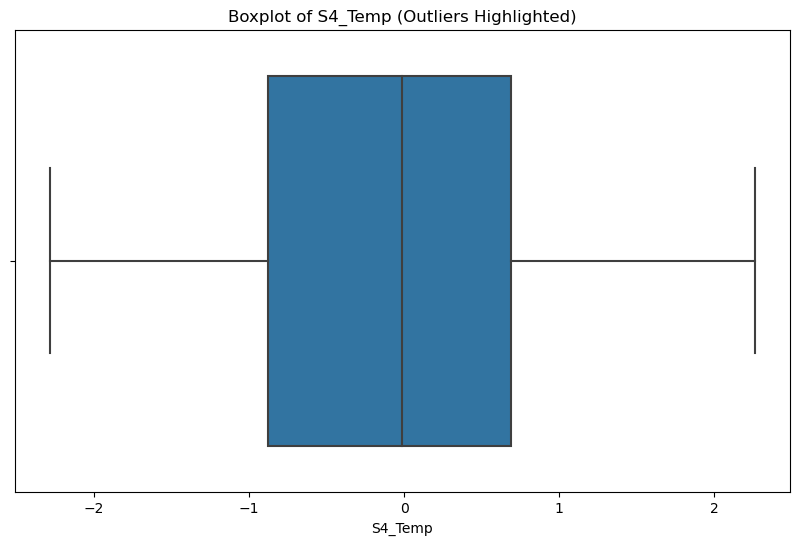

--------------------------------------------------

Analysis of S1_Light
Number of Elements: 10129
IQR: 0.23525377437520106
Number of Outliers: 1716


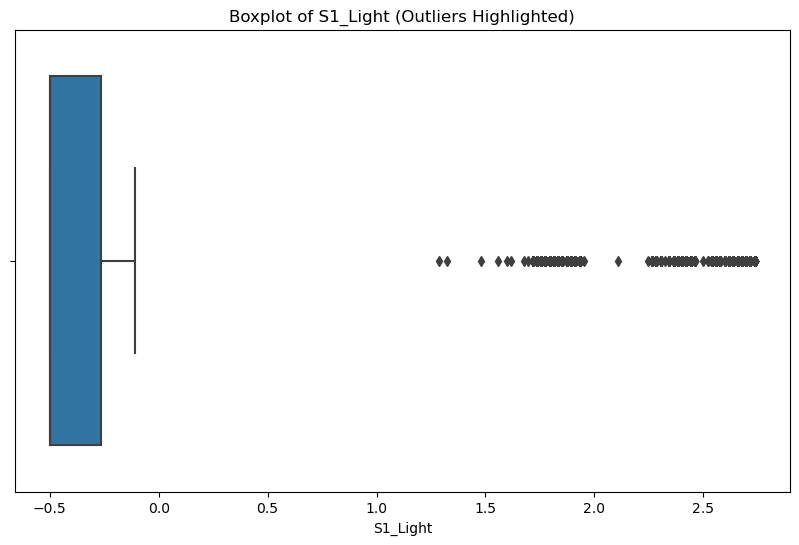

--------------------------------------------------

Analysis of S2_Light
Number of Elements: 10129
IQR: 0.2080211535551925
Number of Outliers: 1017


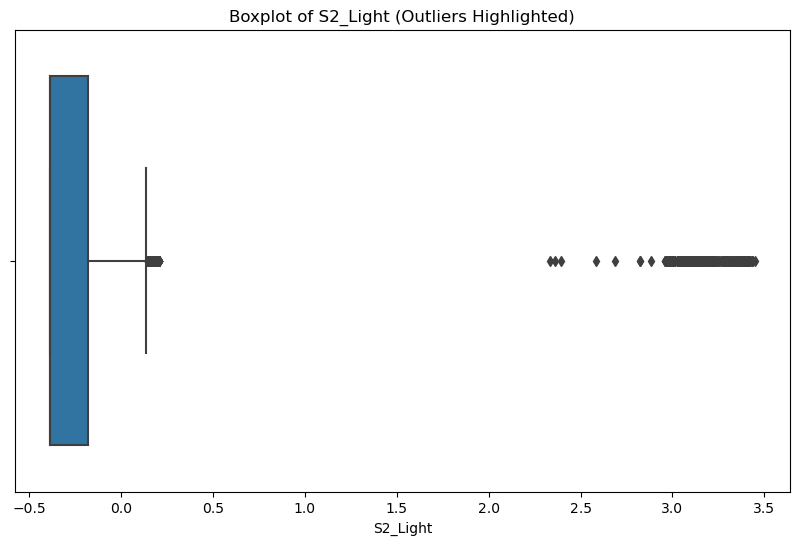

--------------------------------------------------

Analysis of S3_Light
Number of Elements: 10129
IQR: 0.8561957452548712
Number of Outliers: 950


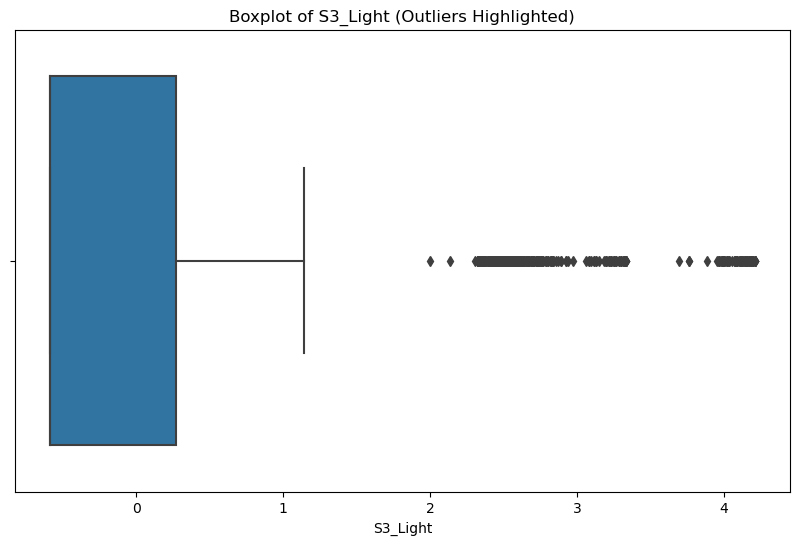

--------------------------------------------------

Analysis of S4_Light
Number of Elements: 10129
IQR: 1.1223773091155682
Number of Outliers: 543


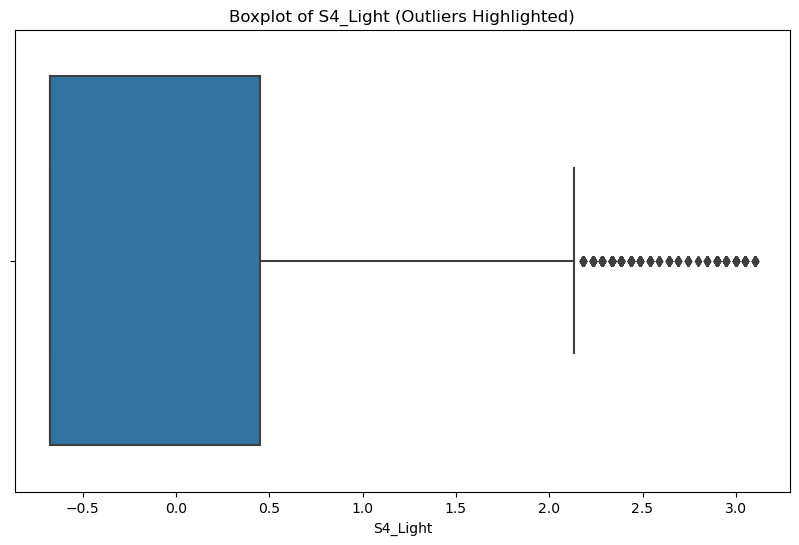

--------------------------------------------------

Analysis of S1_Sound
Number of Elements: 10129
IQR: 0.03157627477662883
Number of Outliers: 1772


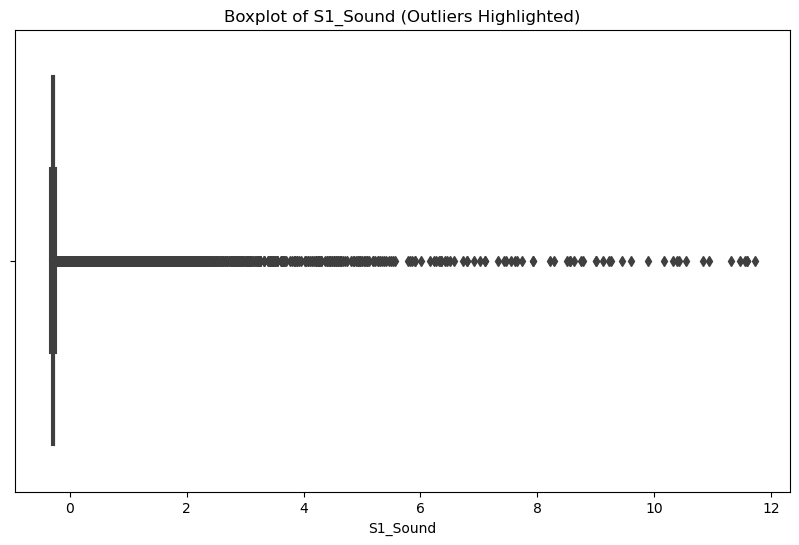

--------------------------------------------------

Analysis of S2_Sound
Number of Elements: 10129
IQR: 0.03752495224201571
Number of Outliers: 1703


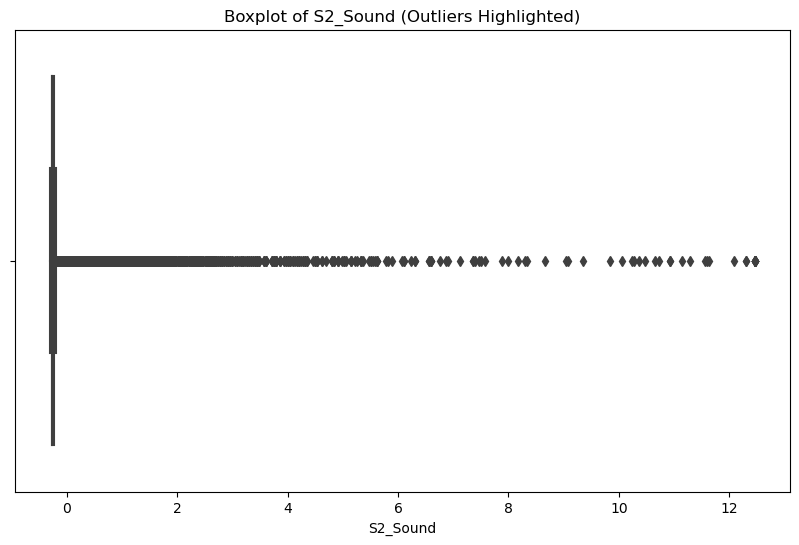

--------------------------------------------------

Analysis of S3_Sound
Number of Elements: 10129
IQR: 0.024177003056736146
Number of Outliers: 1671


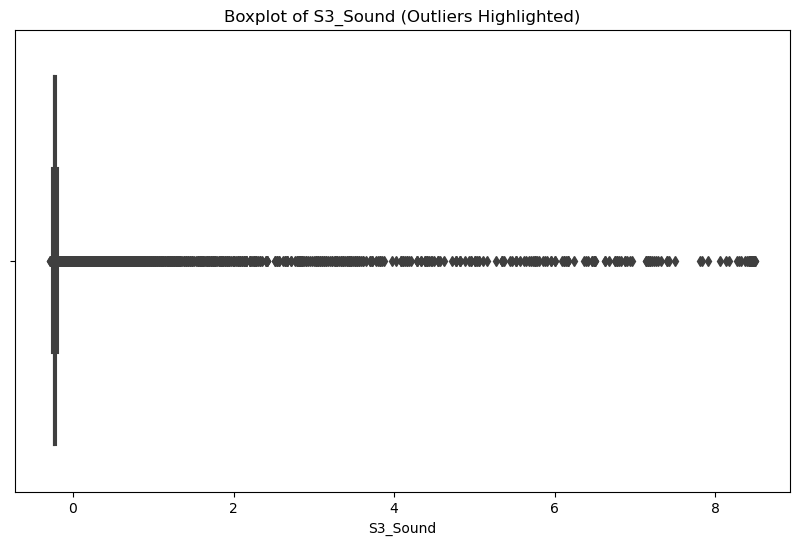

--------------------------------------------------

Analysis of S4_Sound
Number of Elements: 10129
IQR: 0.331463772823432
Number of Outliers: 721


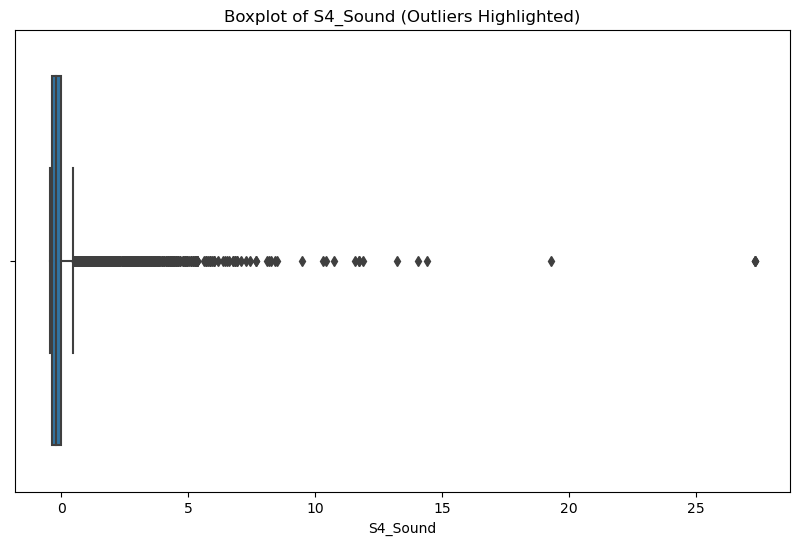

--------------------------------------------------

Analysis of S5_CO2
Number of Elements: 10129
IQR: 0.5501235889669062
Number of Outliers: 1657


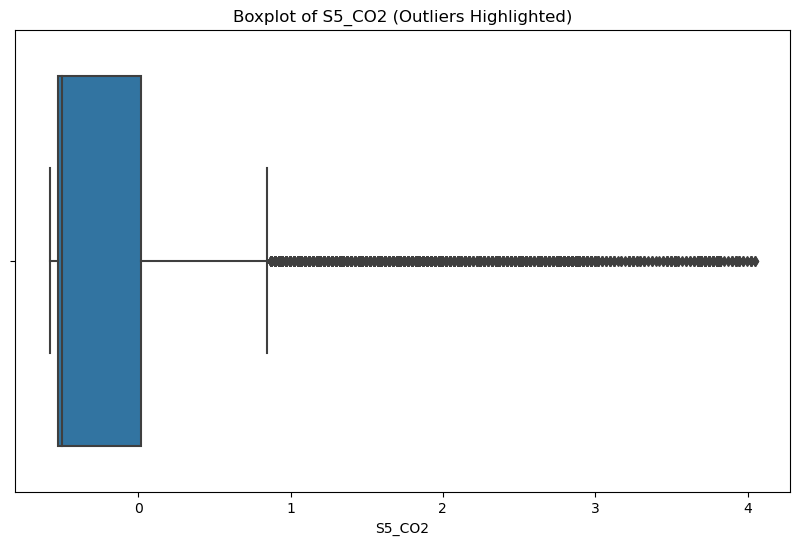

--------------------------------------------------

Analysis of S5_CO2_Slope
Number of Elements: 10129
IQR: 0.0396193454134498
Number of Outliers: 4033


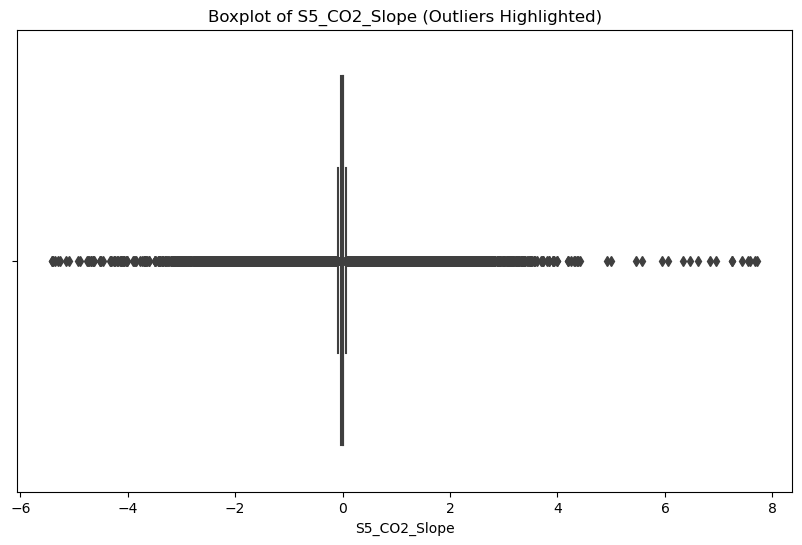

--------------------------------------------------

Analysis of S6_PIR
Number of Elements: 10129
IQR: 0.0
Number of Outliers: 913


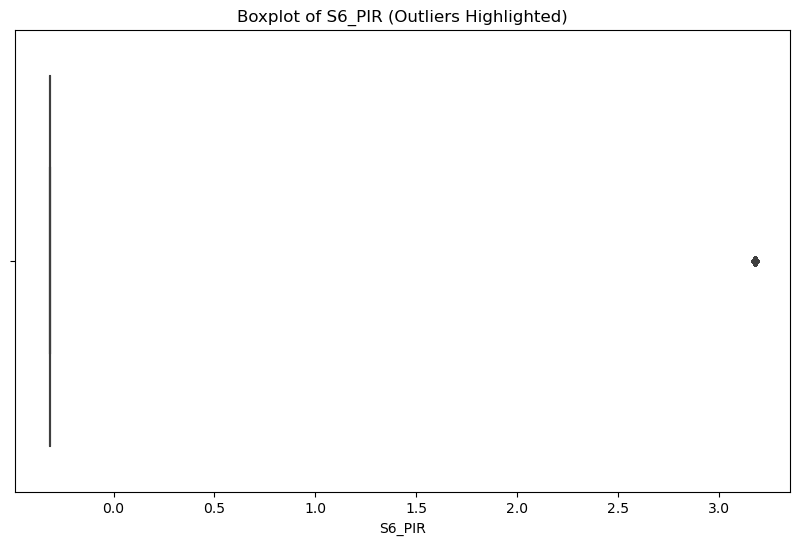

--------------------------------------------------

Analysis of S7_PIR
Number of Elements: 10129
IQR: 0.0
Number of Outliers: 806


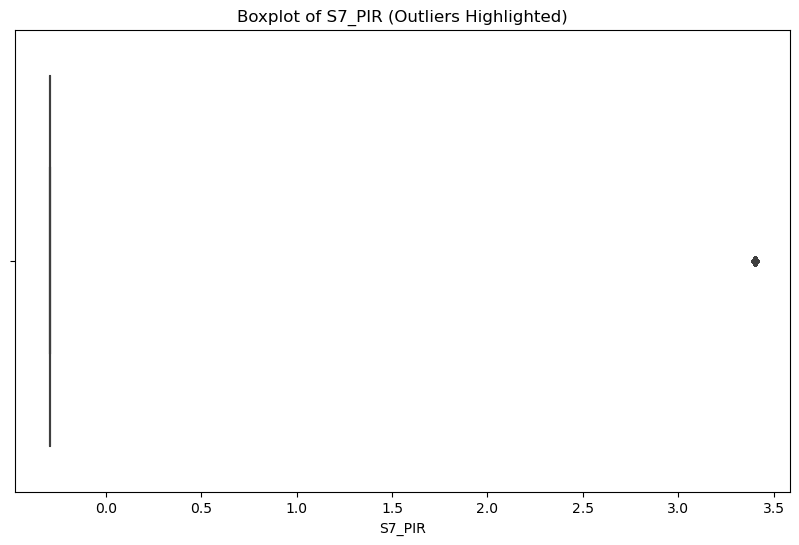

--------------------------------------------------

Analysis of Room_Occupancy_Count
Number of Elements: 10129
IQR: 0.0
Number of Outliers: 1901


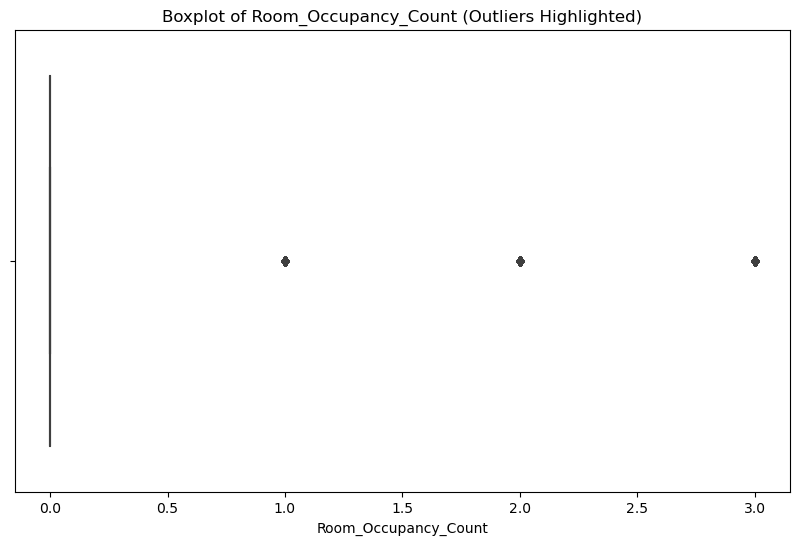

--------------------------------------------------



In [12]:
# IQR and Outliers for each column
for column in data.columns:
    print(f'Analysis of {column}')
    print(f'Number of Elements: {data[column].count()}')

    # Calculate the IQR and identify outliers
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = data[column][(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    print(f'IQR: {IQR}')
    print(f'Number of Outliers: {outliers.count()}')

    # Plotting boxplot to show the outliers of each column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column} (Outliers Highlighted)')
    plt.show()

    print('--------------------------------------------------\n')


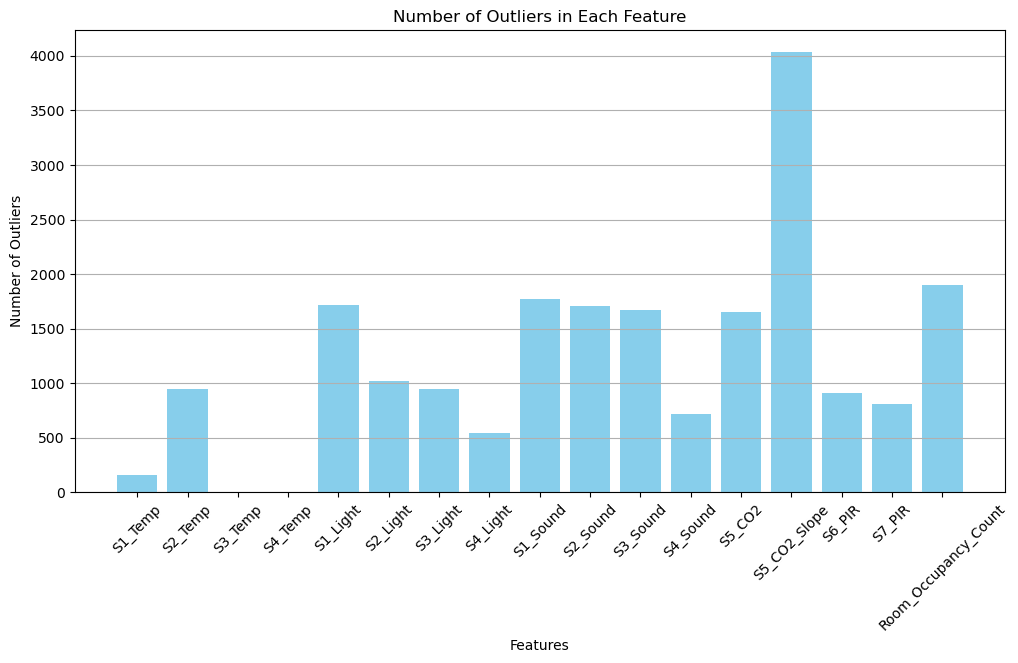

In [13]:
# saving the number of outliers in each column
outlier_counts = []

for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[column][(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    outlier_counts.append(outliers.count())

# Plotting the number of outliers in each column
plt.figure(figsize=(12, 6))
plt.bar(data.columns, outlier_counts, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers in Each Feature')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


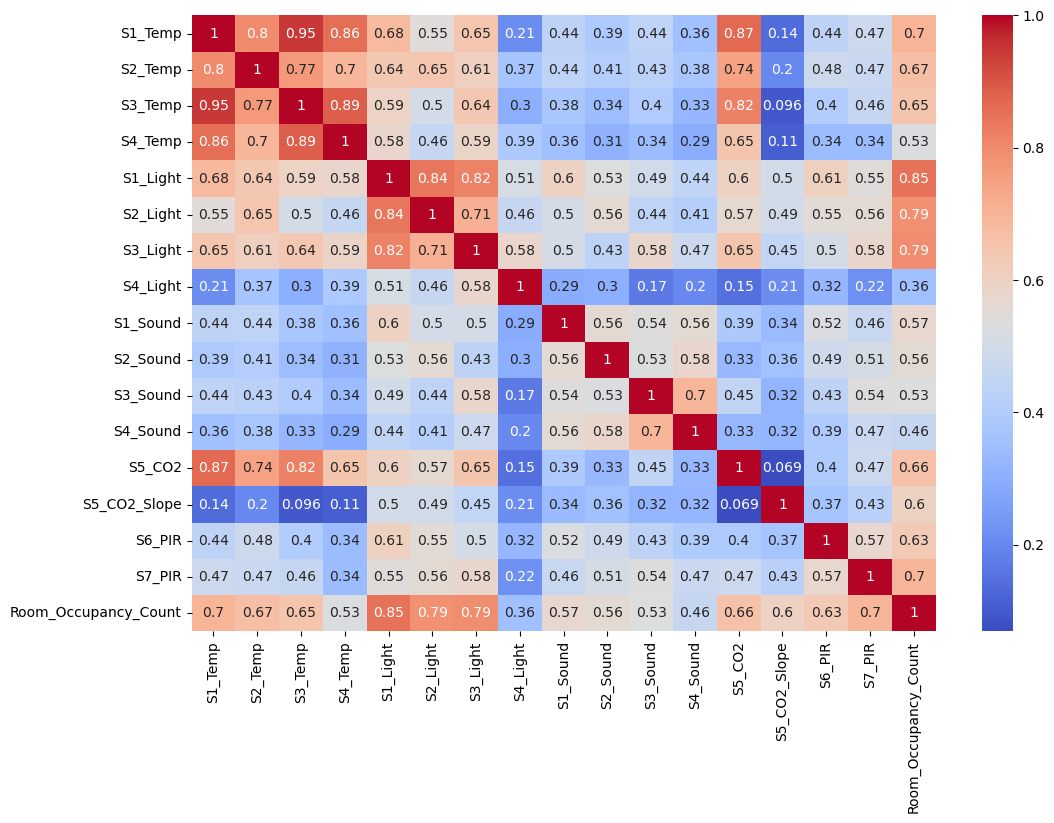

In [14]:
# Correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


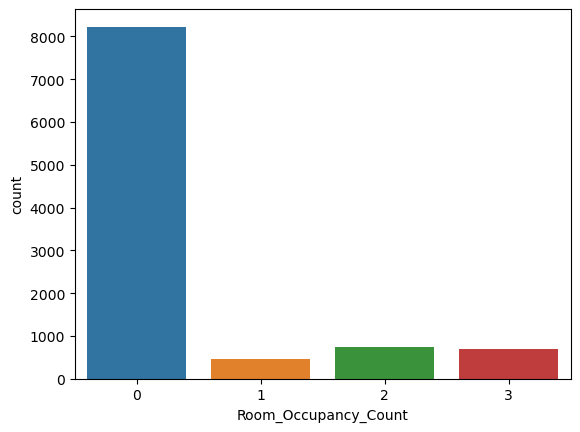

In [15]:
#creating a bar plot to show the frequency of each class in the target feature
sns.countplot(x='Room_Occupancy_Count', data=data)

plt.show()


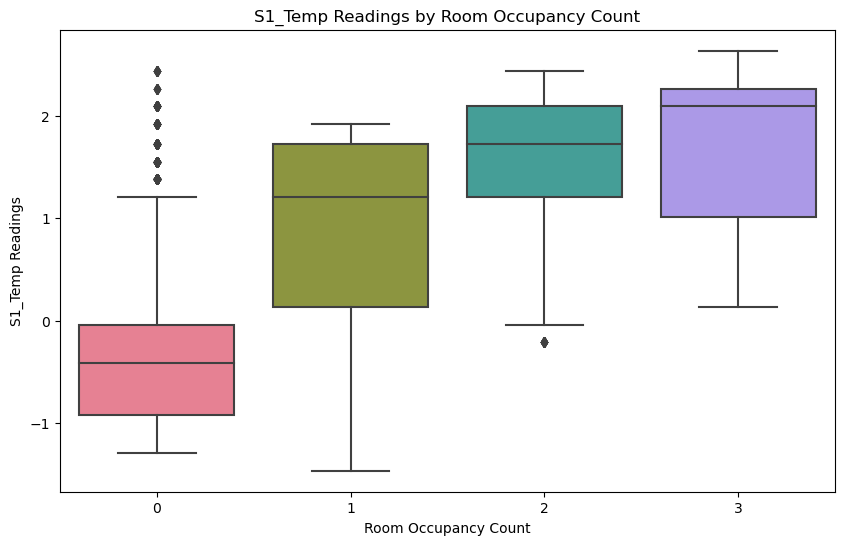

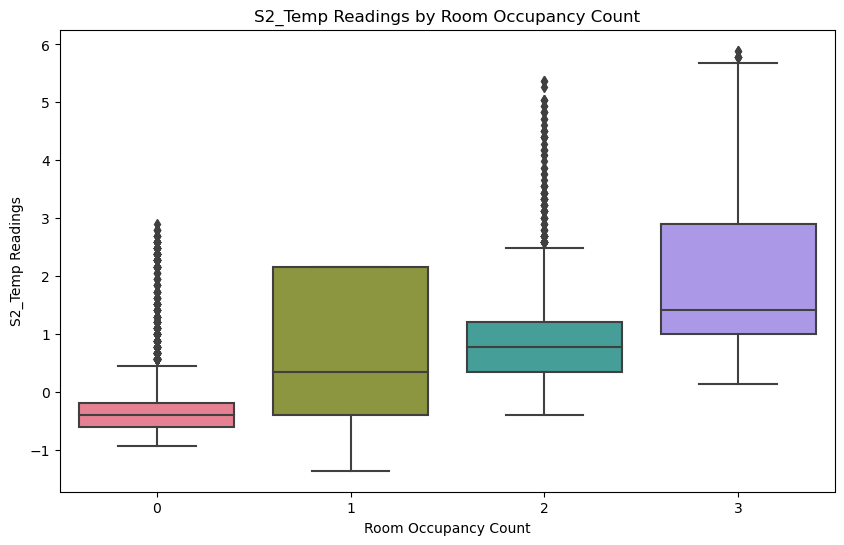

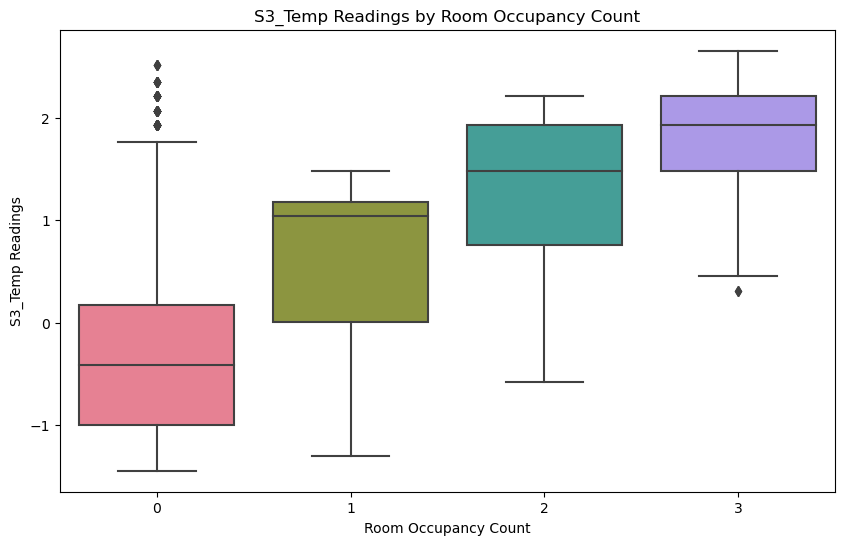

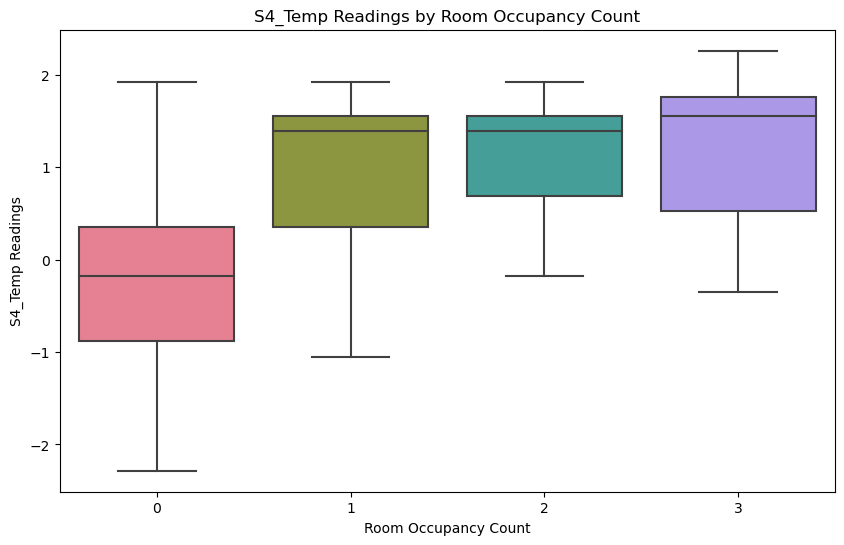

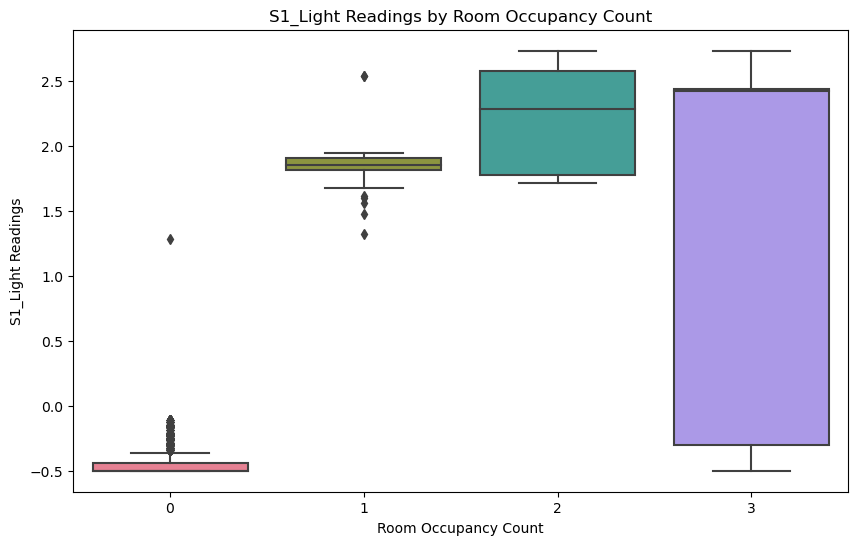

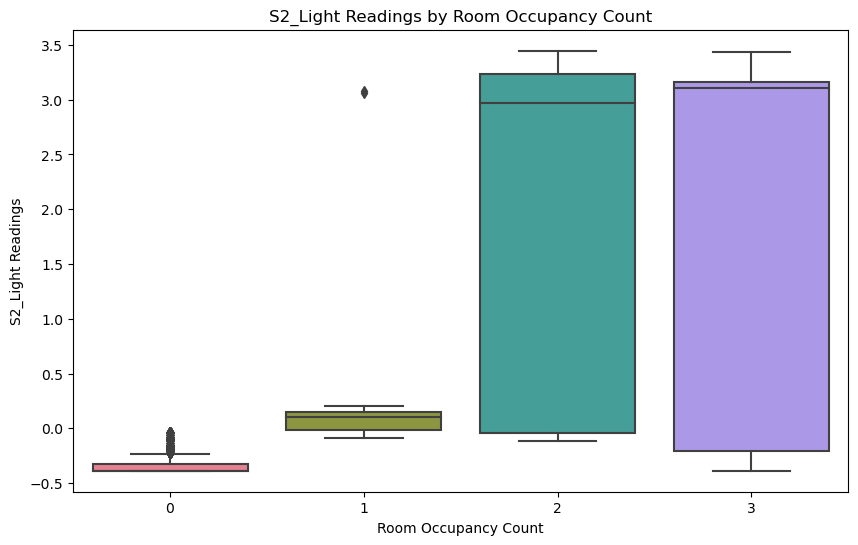

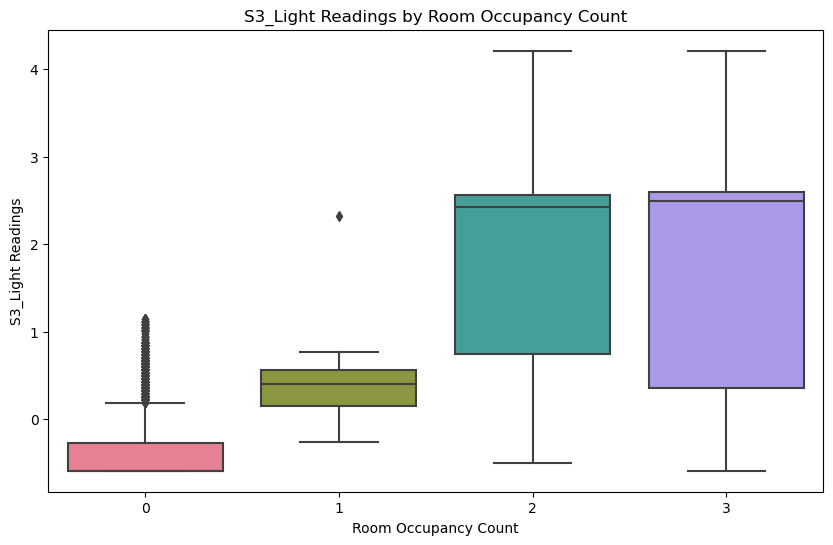

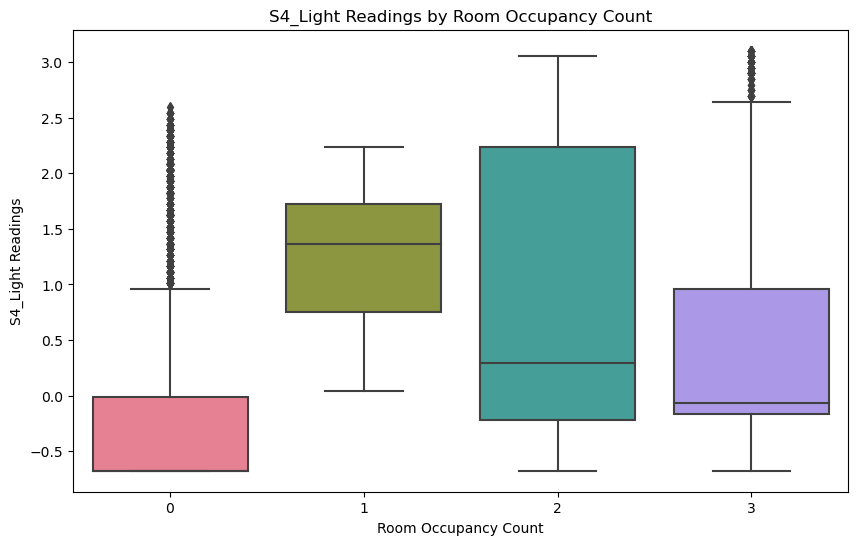

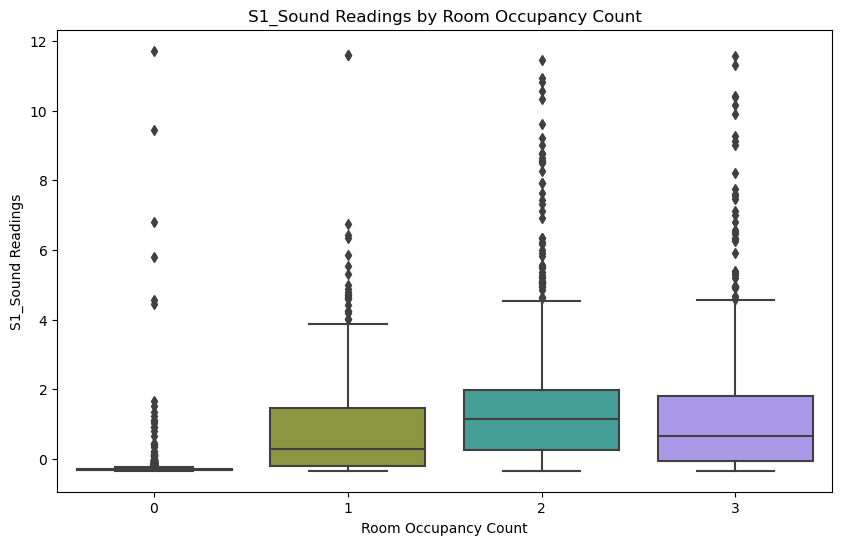

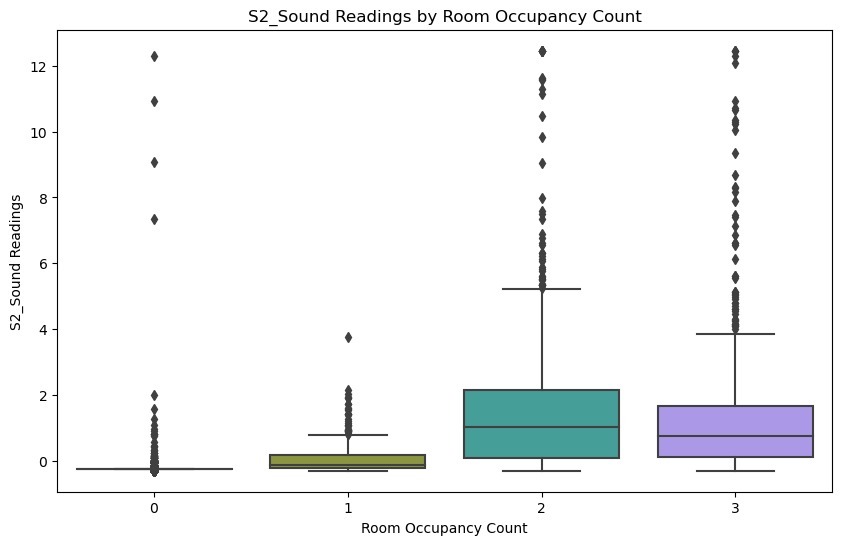

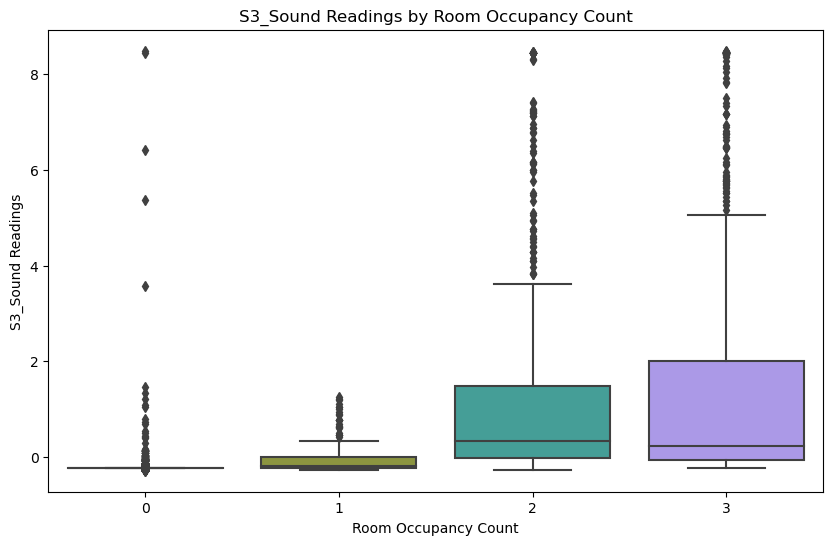

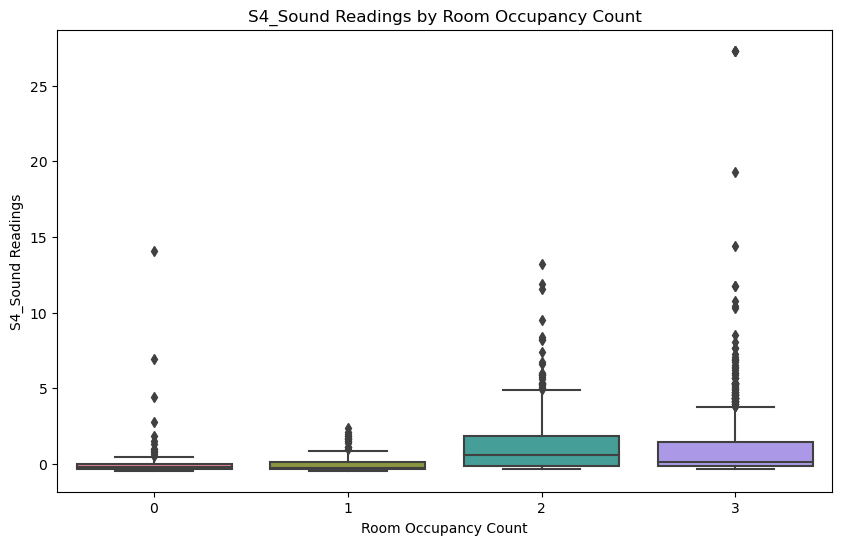

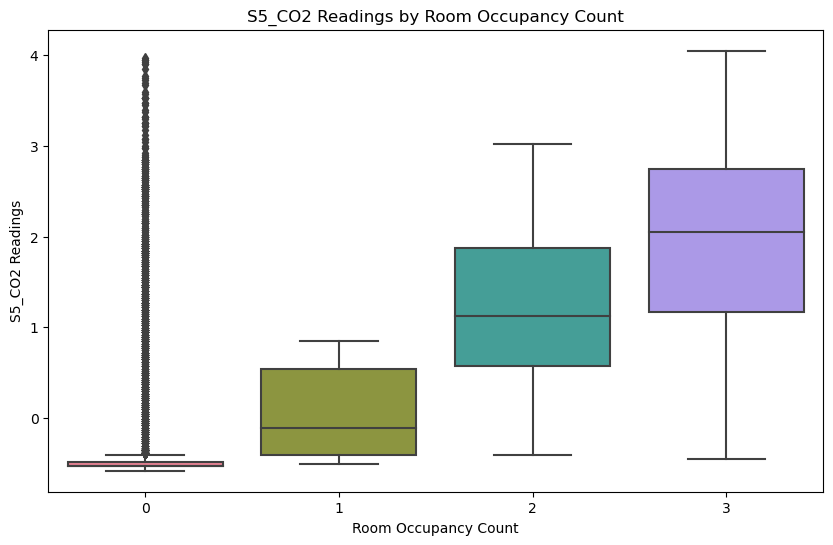

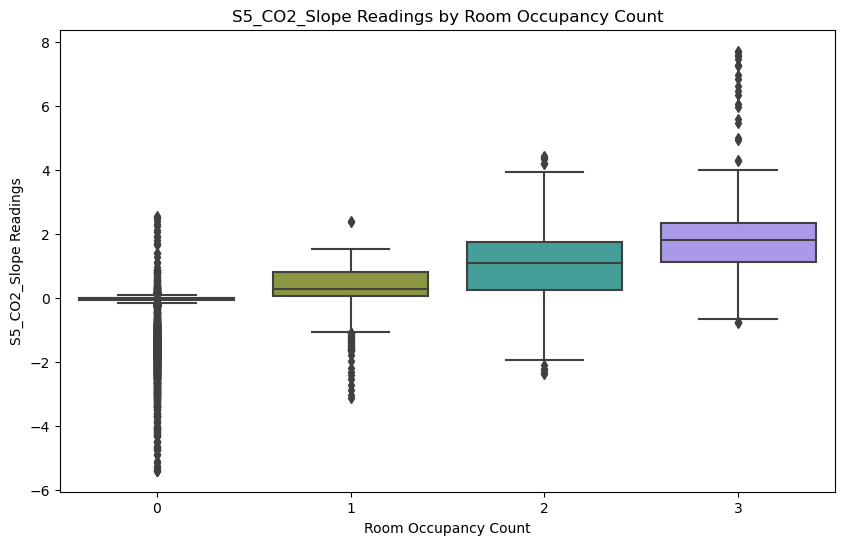

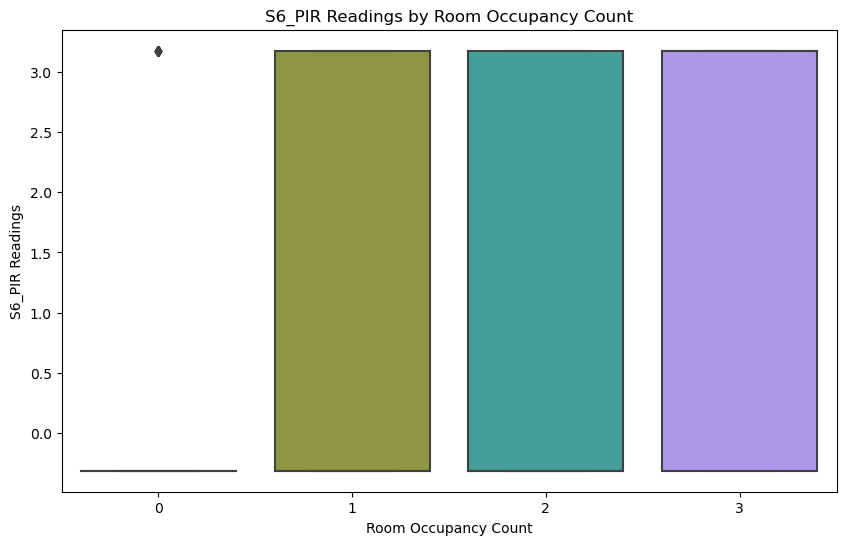

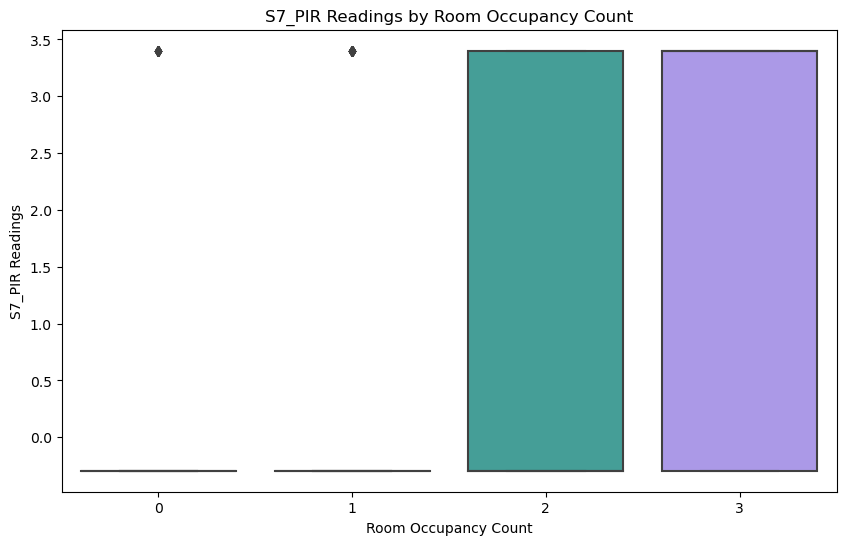

In [16]:
# List of sensor features
sensor_features = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp',
                   'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light',
                   'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 
                   'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']

# Choosing the visualization type 
palette = sns.color_palette("husl", n_colors=len(data['Room_Occupancy_Count'].unique()))

#ploting the target feature with all the other sensors features
for feature in sensor_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Room_Occupancy_Count', y=feature, data=data, palette=palette)
    plt.title(f'{feature} Readings by Room Occupancy Count')
    plt.xlabel('Room Occupancy Count')
    plt.ylabel(f'{feature} Readings')
    plt.show()


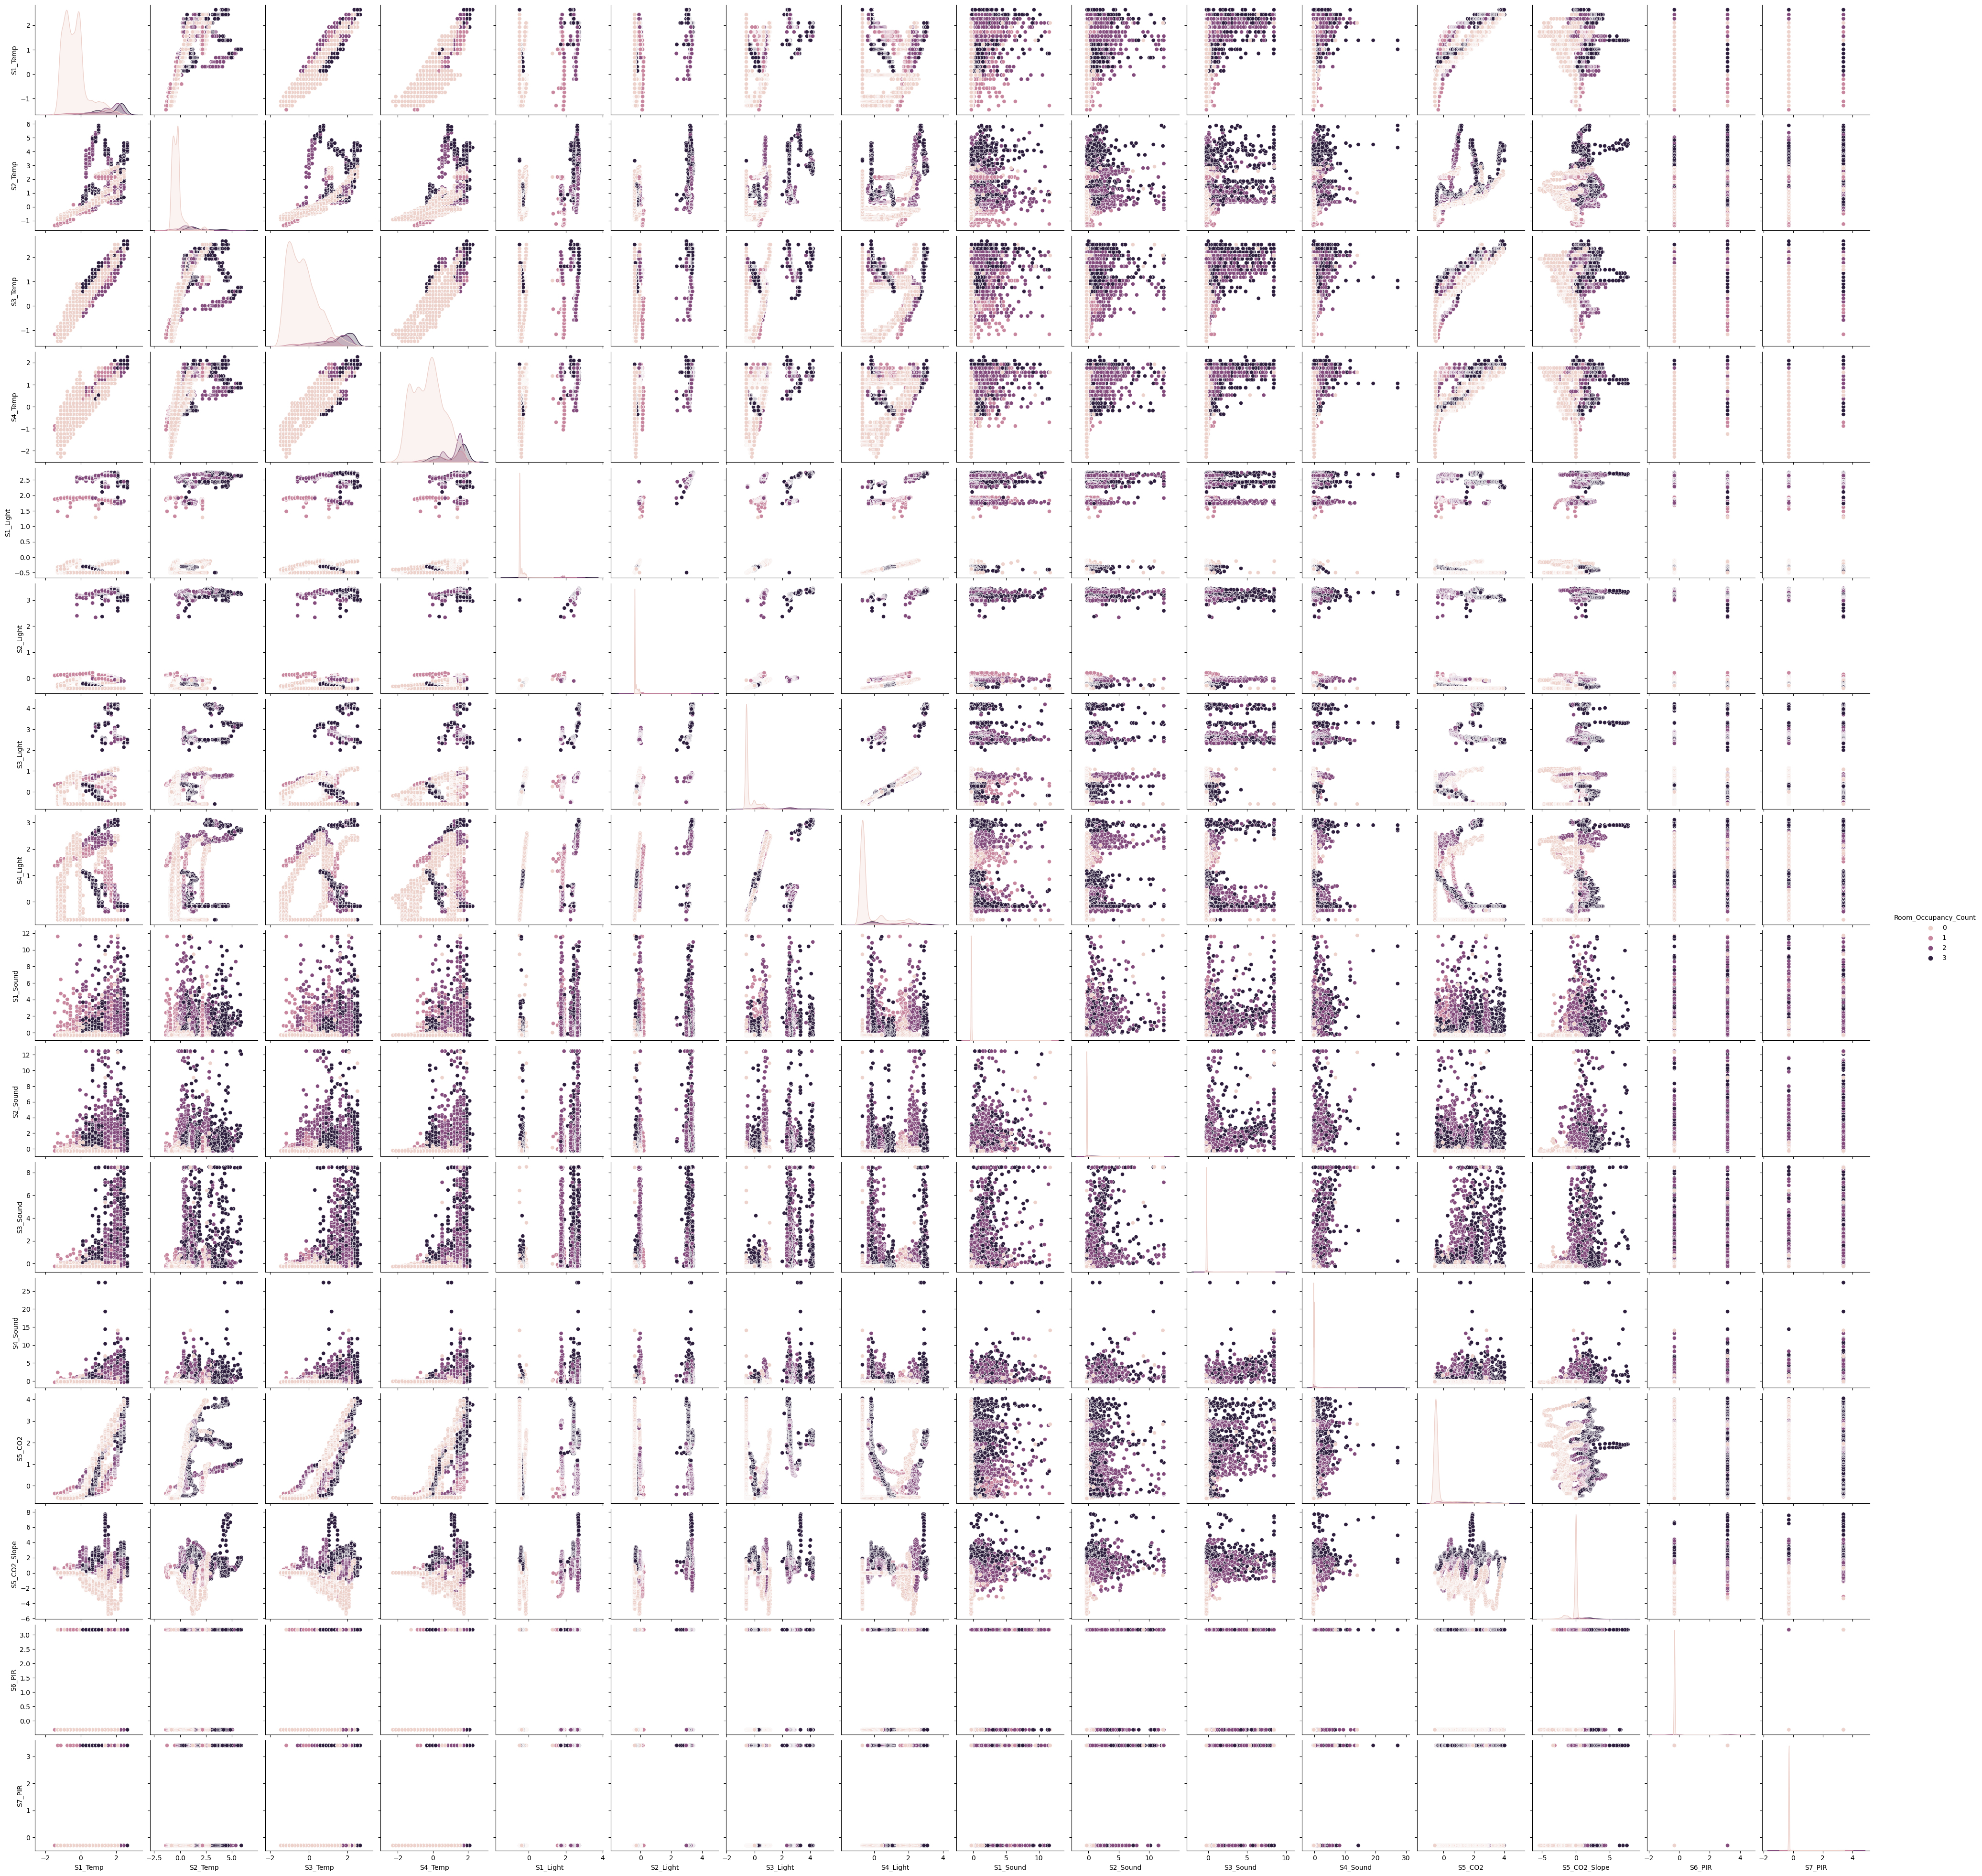

In [17]:
# Create a pairplot with coloring based on 'Room_Occupancy_Count'
sns.pairplot(data, hue='Room_Occupancy_Count')

plt.show()


# Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#dropping the target feature
X = data.drop(['Room_Occupancy_Count'], axis=1) 

#adding the target feature to y variable
y = data['Room_Occupancy_Count']  

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# First Model: RandomForest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest model
rfc = RandomForestClassifier()

# Define a parameter grid to search for best parameters
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

# Grid Search with Cross-Validation
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 200]})

In [20]:
# Print the best parameters found by Grid Search
print("Best Parameters found by Grid Search:", CV_rfc.best_params_)

Best Parameters found by Grid Search: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 100}


In [21]:
# Evaluate the best model on the training data
train_predictions = CV_rfc.predict(X_train)

# Print classification report for training data
print("Classification Report for Training Data:")
print(classification_report(y_train, train_predictions))

# Calculate and print the average precision, recall, and F1-score for training data
train_avg_precision = precision_score(y_train, train_predictions, average='macro')
train_avg_recall = recall_score(y_train, train_predictions, average='macro')
train_avg_f1 = f1_score(y_train, train_predictions, average='macro')

print('--------------------------------------------------\n')

print("Average Precision for Training Data: {:.2f}".format(train_avg_precision))
print("Average Recall for Training Data: {:.2f}".format(train_avg_recall))
print("Average F1 Score for Training Data: {:.2f}".format(train_avg_f1))
print("Accuracy Score for Training Data:", accuracy_score(y_train, train_predictions))

print('--------------------------------------------------\n')

# Print confusion matrix for training data
print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_train, train_predictions))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6609
           1       1.00      1.00      1.00       356
           2       1.00      0.99      0.99       584
           3       0.99      1.00      1.00       554

    accuracy                           1.00      8103
   macro avg       1.00      1.00      1.00      8103
weighted avg       1.00      1.00      1.00      8103

--------------------------------------------------

Average Precision for Training Data: 1.00
Average Recall for Training Data: 1.00
Average F1 Score for Training Data: 1.00
Accuracy Score for Training Data: 0.9992595335061089
--------------------------------------------------

Confusion Matrix for Training Data:
[[6609    0    0    0]
 [   0  355    1    0]
 [   0    0  580    4]
 [   0    0    1  553]]


In [22]:
# Evaluate the best model on the test data
test_predictions = CV_rfc.predict(X_test)

# Print classification report and accuracy score for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, test_predictions))
print("Accuracy Score for Test Data:", accuracy_score(y_test, test_predictions))

# Calculate and print the average precision, recall, and F1-score for test data
avg_precision = precision_score(y_test, test_predictions, average='macro')
avg_recall = recall_score(y_test, test_predictions, average='macro')
avg_f1 = f1_score(y_test, test_predictions, average='macro')

print('--------------------------------------------------\n')

print("Average Precision for Test Data: {:.2f}".format(avg_precision))
print("Average Recall for Test Data: {:.2f}".format(avg_recall))
print("Average F1 Score for Test Data: {:.2f}".format(avg_f1))

print('--------------------------------------------------\n')

# Print confusion matrix for test data
print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, test_predictions))


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.99      0.97      0.98       164
           3       0.97      0.99      0.98       140

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026

Accuracy Score for Test Data: 0.9970384995064165
--------------------------------------------------

Average Precision for Test Data: 0.99
Average Recall for Test Data: 0.99
Average F1 Score for Test Data: 0.99
--------------------------------------------------

Confusion Matrix for Test Data:
[[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  159    4]
 [   0    0    1  139]]


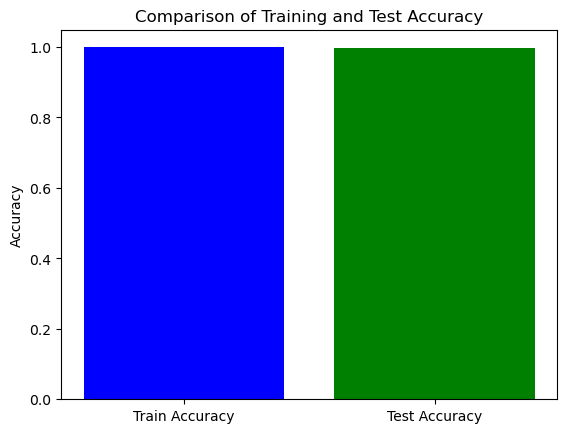

In [23]:
# Plotting the accuracy of the training and the testing data 
plt.bar(['Train Accuracy', 'Test Accuracy'], [accuracy_score(y_train, train_predictions), accuracy_score(y_test, test_predictions)], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Test Accuracy')
plt.show()

# Second Model: SVM

In [24]:
from sklearn.svm import SVC

# SVM model
svm_model = SVC()

# Define a parameter grid to search for best parameters
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmod'],  # Type of kernel
    'gamma': ['1', 'auto'],  # Kernel coefficient
}

# Grid Search with Cross-Validation
CV_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)





/Users/saifhaddad/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/saifhaddad/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/saifhaddad/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/saifhaddad/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constr

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['1', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmod']})

In [25]:
# Print the best parameters found by Grid Search
print("Best Parameters found by Grid Search:", CV_svm.best_params_)

Best Parameters found by Grid Search: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}


In [26]:
# Evaluate the best model on the training data
train_predictions = CV_svm.predict(X_train)

# Print classification report and accuracy score for training data
print("Classification Report for Training Data:")
print(classification_report(y_train, train_predictions))
print("Accuracy Score for Training Data:", accuracy_score(y_train, train_predictions))

# Calculate and print the average precision, recall, and F1-score for training data
avg_precision = precision_score(y_train, train_predictions, average='macro')
avg_recall = recall_score(y_train, train_predictions, average='macro')
avg_f1 = f1_score(y_train, train_predictions, average='macro')

print('--------------------------------------------------\n')

print("Average Precision for Training Data: {:.2f}".format(avg_precision))
print("Average Recall for Training Data: {:.2f}".format(avg_recall))
print("Average F1 Score for Training Data: {:.2f}".format(avg_f1))

print('--------------------------------------------------\n')

# Print confusion matrix for training data
print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_train, train_predictions))

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6609
           1       1.00      0.99      1.00       356
           2       0.97      0.97      0.97       584
           3       0.97      0.98      0.97       554

    accuracy                           1.00      8103
   macro avg       0.99      0.98      0.98      8103
weighted avg       1.00      1.00      1.00      8103

Accuracy Score for Training Data: 0.9956806121189683
--------------------------------------------------

Average Precision for Training Data: 0.99
Average Recall for Training Data: 0.98
Average F1 Score for Training Data: 0.98
--------------------------------------------------

Confusion Matrix for Training Data:
[[6609    0    0    0]
 [   0  353    3    0]
 [   0    0  565   19]
 [   1    0   12  541]]


In [27]:
# Evaluate the best model on the test data
test_predictions = CV_svm.predict(X_test)

# Print classification report and accuracy score for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, test_predictions))
print("Accuracy Score for Test Data:", accuracy_score(y_test, test_predictions))

# Calculate and print the average precision, recall, and F1-score for test data
avg_precision = precision_score(y_test, test_predictions, average='macro')
avg_recall = recall_score(y_test, test_predictions, average='macro')
avg_f1 = f1_score(y_test, test_predictions, average='macro')

print('--------------------------------------------------\n')

print("Average Precision for Test Data: {:.2f}".format(avg_precision))
print("Average Recall for Test Data: {:.2f}".format(avg_recall))
print("Average F1 Score for Test Data: {:.2f}".format(avg_f1))

print('--------------------------------------------------\n')

# Print confusion matrix for test data
print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, test_predictions))

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.97      0.97      0.97       164
           3       0.97      0.96      0.96       140

    accuracy                           0.99      2026
   macro avg       0.98      0.98      0.98      2026
weighted avg       0.99      0.99      0.99      2026

Accuracy Score for Test Data: 0.9945705824284304
--------------------------------------------------

Average Precision for Test Data: 0.98
Average Recall for Test Data: 0.98
Average F1 Score for Test Data: 0.98
--------------------------------------------------

Confusion Matrix for Test Data:
[[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  159    4]
 [   1    0    5  134]]


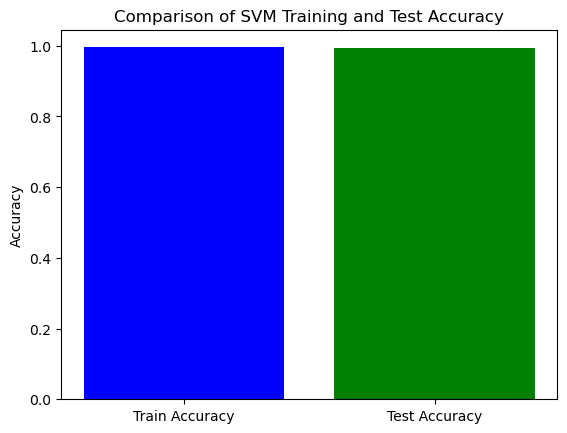

In [28]:
# Plotting the accuracy of the training and testing data
plt.bar(['Train Accuracy', 'Test Accuracy'], [accuracy_score(y_train, train_predictions), accuracy_score(y_test, test_predictions)], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of SVM Training and Test Accuracy')
plt.show()


# Third Model: Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Gradient Boosting model
gbc = GradientBoostingClassifier()

# Define a parameter grid to search for best parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Grid Search with Cross-Validation
CV_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5)
CV_gbc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [30]:
# Print the best parameters found by Grid Search
print("Best Parameters found by Grid Search:", CV_gbc.best_params_)

Best Parameters found by Grid Search: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


In [31]:
# Evaluate the best model on the training data
train_predictions = CV_gbc.predict(X_train)

# Print classification report and accuracy score for training data
print("Classification Report for Training Data:")
print(classification_report(y_train, train_predictions))
print("Accuracy Score for Training Data:", accuracy_score(y_train, train_predictions))

# Calculate and print the average precision, recall, and F1-score for training data
avg_precision = precision_score(y_train, train_predictions, average='macro')
avg_recall = recall_score(y_train, train_predictions, average='macro')
avg_f1 = f1_score(y_train, train_predictions, average='macro')

print('--------------------------------------------------\n')

print("Average Precision for Training Data: {:.2f}".format(avg_precision))
print("Average Recall for Training Data: {:.2f}".format(avg_recall))
print("Average F1 Score for Training Data: {:.2f}".format(avg_f1))

print('--------------------------------------------------\n')

# Print confusion matrix for training data
print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_train, train_predictions))

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6609
           1       1.00      1.00      1.00       356
           2       1.00      1.00      1.00       584
           3       1.00      1.00      1.00       554

    accuracy                           1.00      8103
   macro avg       1.00      1.00      1.00      8103
weighted avg       1.00      1.00      1.00      8103

Accuracy Score for Training Data: 1.0
--------------------------------------------------

Average Precision for Training Data: 1.00
Average Recall for Training Data: 1.00
Average F1 Score for Training Data: 1.00
--------------------------------------------------

Confusion Matrix for Training Data:
[[6609    0    0    0]
 [   0  356    0    0]
 [   0    0  584    0]
 [   0    0    0  554]]


In [32]:
# Evaluate the best model on the test data
test_predictions = CV_gbc.predict(X_test)

# Print classification report and accuracy score for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, test_predictions))
print("Accuracy Score for Test Data:", accuracy_score(y_test, test_predictions))

# Calculate and print the average precision, recall, and F1-score for test data
avg_precision = precision_score(y_test, test_predictions, average='macro')
avg_recall = recall_score(y_test, test_predictions, average='macro')
avg_f1 = f1_score(y_test, test_predictions, average='macro')

print('--------------------------------------------------\n')

print("Average Precision for Test Data: {:.2f}".format(avg_precision))
print("Average Recall for Test Data: {:.2f}".format(avg_recall))
print("Average F1 Score for Test Data: {:.2f}".format(avg_f1))

print('--------------------------------------------------\n')

# Print confusion matrix for test data
print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, test_predictions))

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.99      0.98      0.99       164
           3       0.99      0.97      0.98       140

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026

Accuracy Score for Test Data: 0.9965449160908193
--------------------------------------------------

Average Precision for Test Data: 0.99
Average Recall for Test Data: 0.99
Average F1 Score for Test Data: 0.99
--------------------------------------------------

Confusion Matrix for Test Data:
[[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  161    2]
 [   3    0    1  136]]


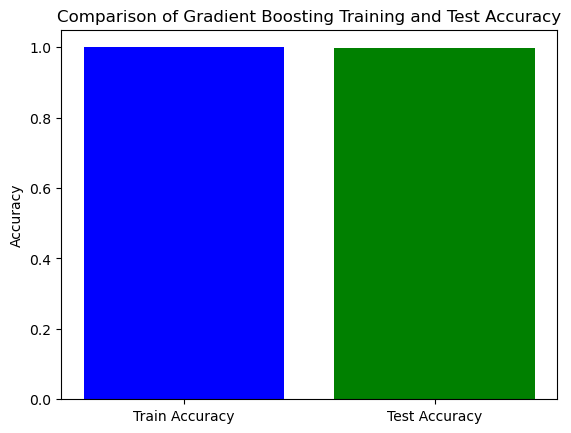

In [33]:
# Plotting the accuracy of the training and testing data
plt.bar(['Train Accuracy', 'Test Accuracy'], [accuracy_score(y_train, train_predictions), accuracy_score(y_test, test_predictions)], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of Gradient Boosting Training and Test Accuracy')
plt.show()

# Fourth Model: XGBoost

In [34]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# XGBoost model
xgb_model = xgb.XGBClassifier()

# Define a parameter grid to search for best parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Grid Search with Cross-Validation
CV_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
CV_xgb.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...one,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [35]:
# Print the best parameters found by Grid Search
print("Best Parameters found by Grid Search:", CV_xgb.best_params_)


Best Parameters found by Grid Search: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


In [36]:
# Evaluate the best model on the training data
train_predictions = CV_xgb.predict(X_train)

# Print classification report and accuracy score for training data
print("Classification Report for Training Data:")
print(classification_report(y_train, train_predictions))
print("Accuracy Score for Training Data:", accuracy_score(y_train, train_predictions))

# Calculate and print the average precision, recall, and F1-score for training data
avg_precision = precision_score(y_train, train_predictions, average='macro')
avg_recall = recall_score(y_train, train_predictions, average='macro')
avg_f1 = f1_score(y_train, train_predictions, average='macro')

print('--------------------------------------------------\n')

print("Average Precision for Training Data: {:.2f}".format(avg_precision))
print("Average Recall for Training Data: {:.2f}".format(avg_recall))
print("Average F1 Score for Training Data: {:.2f}".format(avg_f1))

print('--------------------------------------------------\n')

# Print confusion matrix for training data
print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_train, train_predictions))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6609
           1       1.00      1.00      1.00       356
           2       1.00      1.00      1.00       584
           3       1.00      1.00      1.00       554

    accuracy                           1.00      8103
   macro avg       1.00      1.00      1.00      8103
weighted avg       1.00      1.00      1.00      8103

Accuracy Score for Training Data: 1.0
--------------------------------------------------

Average Precision for Training Data: 1.00
Average Recall for Training Data: 1.00
Average F1 Score for Training Data: 1.00
--------------------------------------------------

Confusion Matrix for Training Data:
[[6609    0    0    0]
 [   0  356    0    0]
 [   0    0  584    0]
 [   0    0    0  554]]


In [37]:
# Evaluate the best model on the test data
test_predictions = CV_xgb.predict(X_test)

# Print classification report and accuracy score for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, test_predictions))
print("Accuracy Score for Test Data:", accuracy_score(y_test, test_predictions))

# Calculate and print the average precision, recall, and F1-score for test data
avg_precision = precision_score(y_test, test_predictions, average='macro')
avg_recall = recall_score(y_test, test_predictions, average='macro')
avg_f1 = f1_score(y_test, test_predictions, average='macro')

print('--------------------------------------------------\n')

print("Average Precision for Test Data: {:.2f}".format(avg_precision))
print("Average Recall for Test Data: {:.2f}".format(avg_recall))
print("Average F1 Score for Test Data: {:.2f}".format(avg_f1))

print('--------------------------------------------------\n')

# Print confusion matrix for test data
print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, test_predictions))

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.99      0.99      0.99       164
           3       0.99      0.99      0.99       140

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026

Accuracy Score for Test Data: 0.998025666337611
--------------------------------------------------

Average Precision for Test Data: 0.99
Average Recall for Test Data: 0.99
Average F1 Score for Test Data: 0.99
--------------------------------------------------

Confusion Matrix for Test Data:
[[1619    0    0    0]
 [   0  103    0    0]
 [   0    1  162    1]
 [   1    0    1  138]]


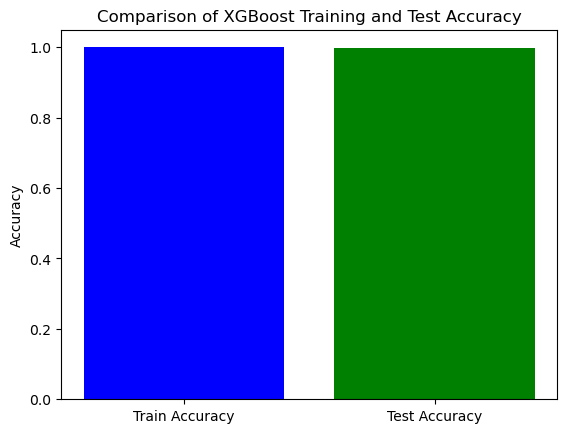

In [38]:
# Plotting the accuracy of the training and testing data
plt.bar(['Train Accuracy', 'Test Accuracy'], [accuracy_score(y_train, train_predictions), accuracy_score(y_test, test_predictions)], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of XGBoost Training and Test Accuracy')
plt.show()
